In [1]:
import numpy as np              #numpy is a library for array operations akin to MATLAB
import matplotlib.pyplot as plt  #matplotlib is 2D plotting library
import time
from numba import njit

In [4]:
@njit(fastmath=True)
def solve_1d_Diff():

    nx = 501
    dx = 2 / (nx - 1)
    nt = 1500    #the number of timesteps we want to calculate
    nu = 0.3   #the value of viscosity
    CFL = .5 #sigma is a parameter, we'll learn more about it later
    dt = CFL * dx**2 / nu #dt is defined using sigma ... more later!
    grid = np.linspace(0,2,nx) # creating the space grid
    
    u0 = np.ones(nx)      #a numpy array with nx elements all equal to 1.
    u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
    u = u0.copy()
    
    un = np.ones(nx) #our placeholder array, un, to advance the solution in time
    
    for n in range(nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nx - 1):
            u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
    
    return u0, u, grid

In [6]:
#compute the cpu time of the solving 1d linear diffusion
start = time.time()
u0, u, grid = solve_1d_Diff()
end = time.time()        
print("Execution time is : {msec} ms".format(msec=(end-start)*1000) )      

Execution time is : 2.576112747192383 ms


Text(0.5, 1.0, '1D Diffusion')

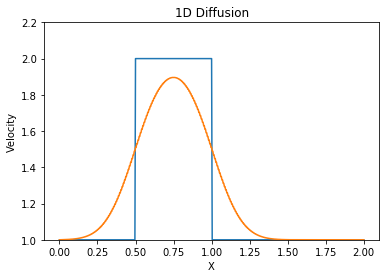

In [7]:
#Plotting data
plt.plot(grid,u0);
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Diffusion') 